## Mapping tutorial with GeoPandas and Matplotlib

This tutorial serves to demonstrate how to create a simple choropleth map considering the five regional health administrations of Portugal (North, Center, Lisbon and Tagus Valley, Alentejo and Algarve). 

To this end, [GeoPandas](https://geopandas.org/) will be used to deal with geospatial data and [Matplotlib](https://matplotlib.org/) for plotting (make sure you have both packages installed, please). In addition, [pandas](https://pandas.pydata.org/) will also be used to manage COVID-19 data.

Currently, in addition to the map of mainland Portugal divided into the five regional health administrations in the [shapefile](https://en.wikipedia.org/wiki/Shapefile) format, a similar file with the autonomous regions is also available, as well as a version of each map in the [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) format. You can replace the file used in this tutorial with any of these files and create new charts! 

In [1]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
PATH_MAP = "../extra/mapas/portugal_continental/"
PATH_DATA = "../"

In [3]:
VARIABLE = "confirmados"
MAP_NAME = "Portugal Continental"

NOMENCLATURE = {
    MAP_NAME: "portugal_continental"
}

In [4]:
# A GeoDataFrame works like a pandas DataFrame.

df_map = geopandas.read_file(f"{PATH_MAP}/{NOMENCLATURE[MAP_NAME]}.shp")

In [5]:
df_map.head()

,CCDR,geometry
0,Alentejo,"MULTIPOLYGON (((-7.42811 37.74137, -7.42816 37..."
1,Algarve,"MULTIPOLYGON (((-7.88042 36.97347, -7.88042 36..."
2,Centro,"MULTIPOLYGON (((-8.70219 39.63742, -8.70165 39..."
3,Norte,"MULTIPOLYGON (((-8.25509 40.85585, -8.25456 40..."
4,RLVT,"MULTIPOLYGON (((-8.76458 38.50812, -8.76458 38..."


In [6]:
df_data = pd.read_csv(f"{PATH_DATA}data.csv")

In [7]:
df_data.tail()

,data,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,confirmados_40_49_f,confirmados_40_49_m,confirmados_50_59_f,confirmados_50_59_m,confirmados_60_69_f,confirmados_60_69_m,confirmados_70_79_f,confirmados_70_79_m,confirmados_80_plus_f,confirmados_80_plus_m
16,13-03-2020,112,53,6,46,0,6,0,0,1.0,...,14.0,14.0,2.0,12.0,3.0,8.0,3.0,3.0,0.0,2.0
17,14-03-2020,169,77,8,73,0,7,0,0,4.0,...,19.0,22.0,5.0,21.0,3.0,9.0,4.0,7.0,1.0,2.0
18,15-03-2020,245,103,10,116,0,10,1,0,5.0,...,27.0,26.0,16.0,27.0,6.0,12.0,5.0,12.0,3.0,2.0
19,16-03-2020,331,138,31,142,0,13,1,0,5.0,...,32.0,36.0,21.0,31.0,11.0,26.0,10.0,18.0,8.0,4.0
20,17-03-2020,448,196,51,180,0,14,1,0,6.0,...,47.0,46.0,32.0,41.0,18.0,34.0,13.0,22.0,12.0,5.0


In [8]:
# Let's consider confirmed cases from the most recent date available.

df_most_recent_date = df_data.tail(1)

In [9]:
df_most_recent_date

,data,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,confirmados_40_49_f,confirmados_40_49_m,confirmados_50_59_f,confirmados_50_59_m,confirmados_60_69_f,confirmados_60_69_m,confirmados_70_79_f,confirmados_70_79_m,confirmados_80_plus_f,confirmados_80_plus_m
20,17-03-2020,448,196,51,180,0,14,1,0,6.0,...,47.0,46.0,32.0,41.0,18.0,34.0,13.0,22.0,12.0,5.0


In [10]:
confirmed_col = {
    "Alentejo": df_most_recent_date["confirmados_arsalentejo"].item(),
    "Algarve": df_most_recent_date["confirmados_arsalgarve"].item(),
    "Centro": df_most_recent_date["confirmados_arscentro"].item(),
    "Norte": df_most_recent_date["confirmados_arsnorte"].item(), 
    "RLVT": df_most_recent_date["confirmados_arslvt"].item()
}

In [11]:
# For each regional health administration, let's add the number of confirmed cases in a new column.

df_map[VARIABLE] = df_map["CCDR"].map(confirmed_col)

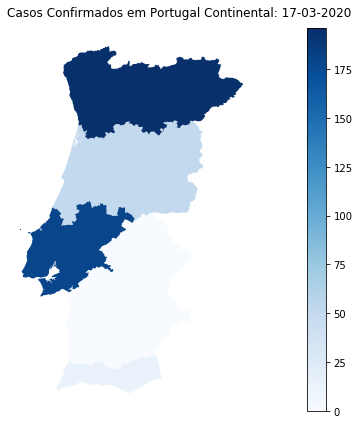

In [12]:
# Finally, let's generate a choropleth map of a GeoDataFrame with Matplotlib.

fig, ax = plt.subplots(figsize=(15,6))

ax.set_title(f"Casos Confirmados em {MAP_NAME}: {df_most_recent_date['data'].item()}", loc="left", pad=12.0)
ax.axis('off')

df_map.plot(
    column=VARIABLE, 
    cmap='Blues', 
    ax=ax,
    legend=True
)

fig.tight_layout()
# plt.savefig('map.png', dpi=300, bbox_inches='tight')
plt.show()